In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r'C:\Users\joneh\master_thesis\data\news\TheGuardian\TG_CrudeANDOil.csv')
df.index = pd.to_datetime(df['datetime'])

display(df.head(2))

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime
datetime,,,,,,,,,,,,
2023-12-31 07:00:56+00:00,business/2023/dec/31/smiles-all-round-as-finan...,article,business,Business,2023-12-31T07:00:56Z,Smiles all round as financial markets end 2023...,https://www.theguardian.com/business/2023/dec/...,https://content.guardianapis.com/business/2023...,False,pillar/news,News,2023-12-31 07:00:56+00:00
2023-12-28 16:02:15+00:00,business/live/2023/dec/28/pound-dollar-uk-econ...,liveblog,business,Business,2023-12-28T16:02:15Z,"UK dealmaking shrinks in 2023, but economy pre...",https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-28 16:02:15+00:00


### News frequency

C:\Users\joneh\AppData\Local\Temp\ipykernel_8096\3474441893.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ax.xaxis.set_major_formatter(plt.FixedFormatter(frequecy.index.to_period('M')))


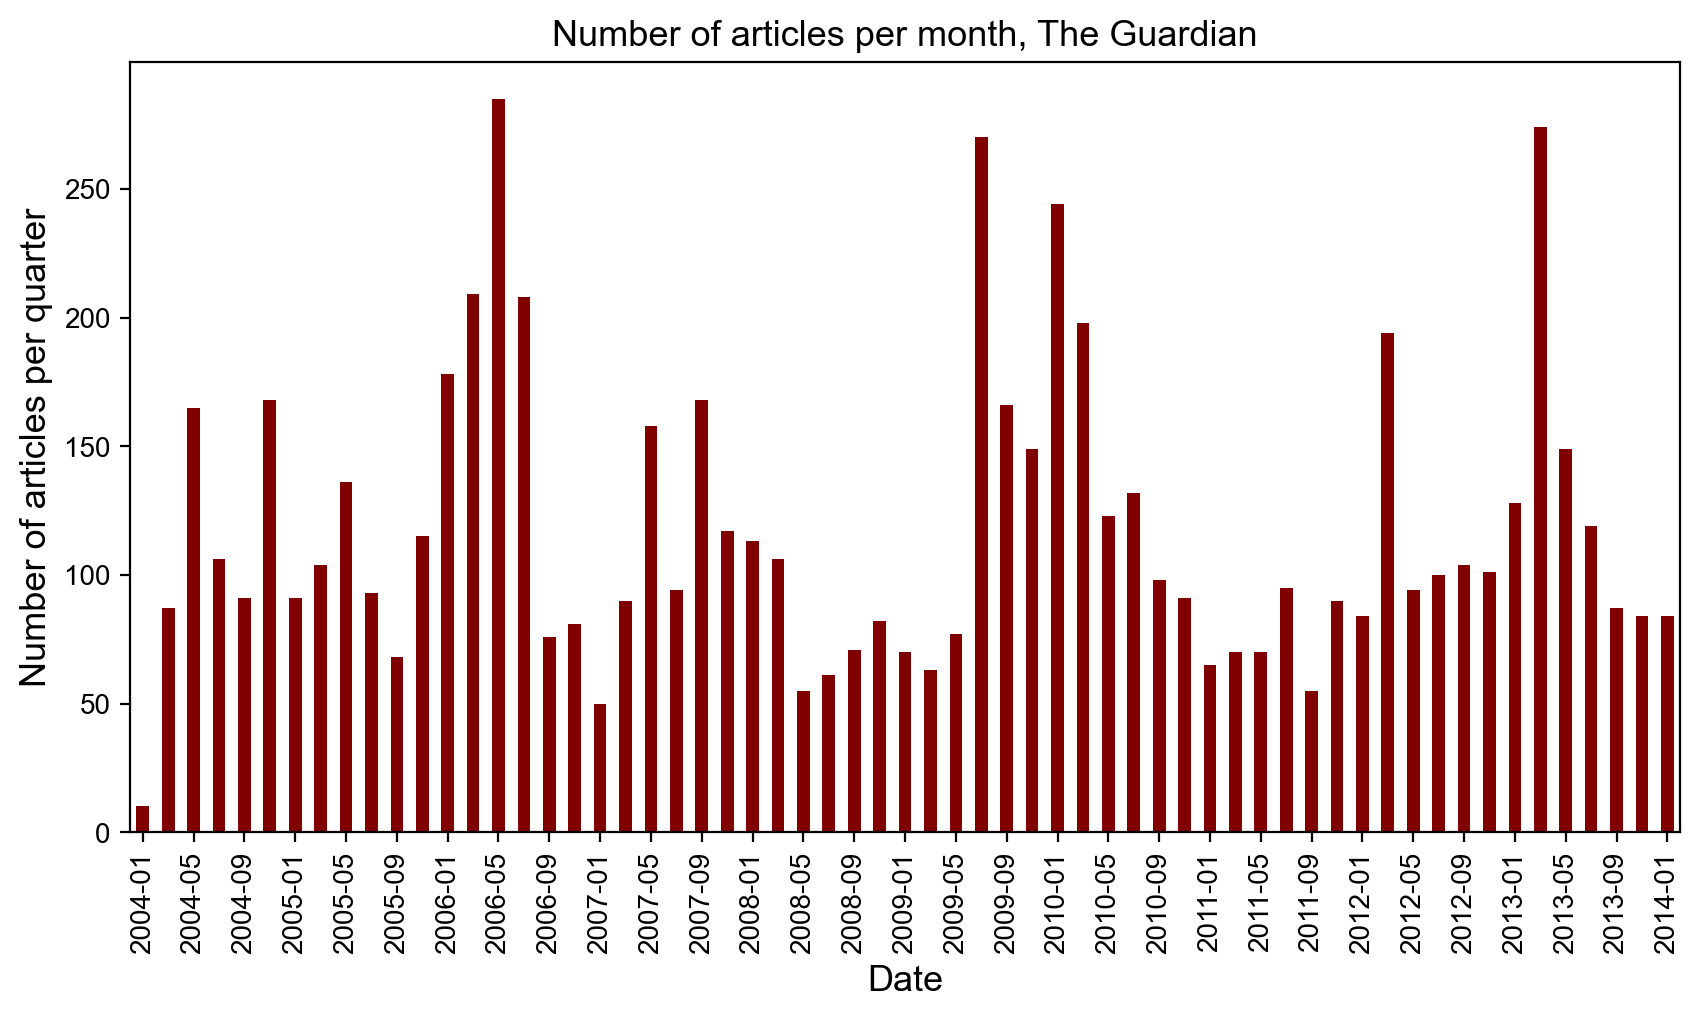

In [31]:
# count numer of articles each day
df['count'] = 1
frequecy = df['count'].resample('4m').sum()

plt.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

frequecy.plot(kind='bar', ax=ax, color='maroon')
ax.set_title('Number of articles per month, The Guardian', fontsize=13)
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Number of articles per quarter', fontsize=13)

# format x-axis ticks
ax.xaxis.set_major_formatter(plt.FixedFormatter(frequecy.index.to_period('M')))
ax.set_xticks(range(0, len(frequecy), 2));